In [183]:
import pandas as pd
import datetime

In [184]:
def add_dataframe(list_of_df, year):
    df = pd.read_excel("mrtssales92-present.xls", sheet_name=year, skiprows=4, skipfooter=45)
    df.drop(["Unnamed: 0", "TOTAL"], axis=1, inplace=True)
    df.rename({"Unnamed: 1" : "Kind of Business"}, axis=1, inplace=True)
    df_trans = df.melt(id_vars="Kind of Business",value_vars=df.columns[1:])
    df_trans.replace("(S)", "0", inplace=True)
    df_trans.replace("(NA)", "0", inplace=True)
    df_trans.dropna(axis=0, inplace=True)
    df_trans["Period"] = "01 " + df_trans["variable"]
    df_trans["value"] = df_trans["value"].astype(float)
    df_trans = df_trans.astype({"Period" : "datetime64[ns]"})
    df_trans.drop("variable", axis=1, inplace=True)
    
    list_of_df.append(df_trans)

In [185]:
list_df = []
years = []
year = 2020
while year >= 1992:
    years.append(str(year))
    year -= 1

for year in years:
    add_dataframe(list_df, year)
    
df_stacked = pd.concat(list_df)
df_stacked.reset_index(inplace=True)
df_stacked.drop("index", axis=1, inplace=True)
df_stacked

,Kind of Business,value,Period
0,"Retail and food services sales, total",480301.0,2020-01-01
1,Retail sales and food services excl motor vehi...,386934.0,2020-01-01
2,Retail sales and food services excl gasoline s...,440605.0,2020-01-01
3,Retail sales and food services excl motor vehi...,347238.0,2020-01-01
4,"Retail sales, total",418734.0,2020-01-01
...,...,...,...
22819,Drinking places,1034.0,1992-12-01
22820,Restaurants and other eating places,14994.0,1992-12-01
22821,Full service restaurants,7329.0,1992-12-01
22822,Limited service eating places,7665.0,1992-12-01


In [186]:
type(df_stacked.iloc[0])

pandas.core.series.Series

In [187]:
type(df_stacked.iloc[0][0])

str

In [188]:
type(df_stacked.iloc[0][1])

numpy.float64

In [189]:
type(df_stacked.iloc[0][2])

pandas._libs.tslibs.timestamps.Timestamp

In [190]:
testinglist=[]
add_dataframe(testinglist, "2008")

In [191]:
testinglist[0]

,Kind of Business,value,Period
1,"Retail and food services sales, total",342639.0,2008-01-01
2,Retail sales and food services excl motor vehi...,276796.0,2008-01-01
3,Retail sales and food services excl gasoline s...,303949.0,2008-01-01
4,Retail sales and food services excl motor vehi...,238106.0,2008-01-01
5,"Retail sales, total",307576.0,2008-01-01
...,...,...,...
787,Food services and drinking places,37723.0,2008-12-01
788,Drinking places,1676.0,2008-12-01
789,Restaurants and other eating places,32664.0,2008-12-01
790,Full service restaurants,16644.0,2008-12-01


In [192]:
df_mens_stores = df_stacked[df_stacked["Kind of Business"] == "Men's clothing stores"].copy()
df_mens_stores

,Kind of Business,value,Period
35,Men's clothing stores,599.0,2020-01-01
102,Men's clothing stores,615.0,2020-02-01
169,Men's clothing stores,302.0,2020-03-01
236,Men's clothing stores,86.0,2020-04-01
303,Men's clothing stores,155.0,2020-05-01
...,...,...,...
22529,Men's clothing stores,777.0,1992-08-01
22595,Men's clothing stores,762.0,1992-09-01
22661,Men's clothing stores,841.0,1992-10-01
22727,Men's clothing stores,913.0,1992-11-01


<AxesSubplot:>

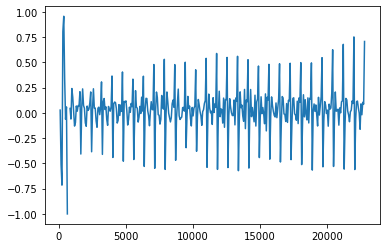

In [193]:
df_mens_stores["value"].pct_change().plot()

In [194]:
df_mens_stores["Year"] = pd.DatetimeIndex(df_mens_stores["Period"]).year

In [195]:
df_mens_stores

,Kind of Business,value,Period,Year
35,Men's clothing stores,599.0,2020-01-01,2020
102,Men's clothing stores,615.0,2020-02-01,2020
169,Men's clothing stores,302.0,2020-03-01,2020
236,Men's clothing stores,86.0,2020-04-01,2020
303,Men's clothing stores,155.0,2020-05-01,2020
...,...,...,...,...
22529,Men's clothing stores,777.0,1992-08-01,1992
22595,Men's clothing stores,762.0,1992-09-01,1992
22661,Men's clothing stores,841.0,1992-10-01,1992
22727,Men's clothing stores,913.0,1992-11-01,1992


In [196]:
df_mens_stores.groupby("Year").agg({"value" : "sum"})

,value
Year,
1992,10179.0
1993,9962.0
1994,10032.0
1995,9315.0
1996,9546.0
1997,10069.0
1998,10196.0
1999,9667.0
2000,9507.0


In [197]:
mens_pct = df_mens_stores.groupby("Year").agg({"value" : "sum"}).pct_change()

<AxesSubplot:xlabel='Year'>

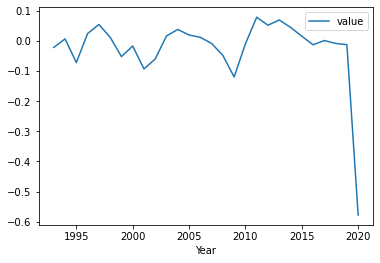

In [198]:
mens_pct.plot()

In [199]:
df_womens_stores = df_stacked[df_stacked["Kind of Business"] == "Women's clothing stores"].copy()
df_womens_stores["Year"] = pd.DatetimeIndex(df_womens_stores["Period"]).year
womens_pct = df_womens_stores.groupby("Year").agg({"value" : "sum"}).pct_change()

In [200]:
combined_df["Men's Clothing Stores Sales"] = mens_pct["value"].copy()

In [201]:
combined_df["Women's Clothing Stores Sales"] = womens_pct["value"]

<AxesSubplot:title={'center':'TEST'}, xlabel='Year', ylabel='% Change'>

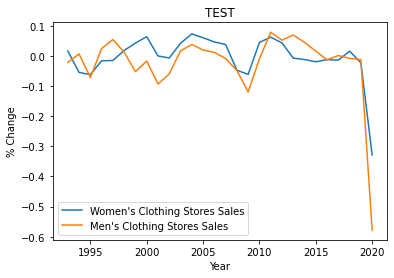

In [202]:
combined_df.plot(title="TEST", ylabel="% Change")

In [203]:
combined_df.head()

,Women's Clothing Stores Sales,Men's Clothing Stores Sales
Year,,
1992,NaN,NaN
1993,0.016816,-0.021318
1994,-0.054560,0.007027
1995,-0.061762,-0.071471
1996,-0.015960,0.024799


In [204]:
mens_sales = df_mens_stores.groupby("Year").agg({"value" : "sum"})
mens_sales

,value
Year,
1992,10179.0
1993,9962.0
1994,10032.0
1995,9315.0
1996,9546.0
1997,10069.0
1998,10196.0
1999,9667.0
2000,9507.0


In [205]:
df_womens_stores = df_stacked[df_stacked["Kind of Business"] == "Women's clothing stores"].copy()
df_womens_stores["Year"] = pd.DatetimeIndex(df_womens_stores["Period"]).year
womens_sales = df_womens_stores.groupby("Year").agg({"value" : "sum"})

In [206]:
womens_sales

,value
Year,
1992,31815.0
1993,32350.0
1994,30585.0
1995,28696.0
1996,28238.0
1997,27822.0
1998,28332.0
1999,29549.0
2000,31447.0


In [207]:
combined_sales = mens_sales.copy()

In [214]:
combined_sales.rename({"value":"Men's Sales"}, axis=1, inplace=True)

In [216]:
combined_sales["Women's Sales"] = womens_sales["value"]

In [218]:
combined_sales["Total"] = combined_sales["Men's Sales"] + combined_sales["Women's Sales"]

In [224]:
combined_sales["Men's Percentage (%)"] = round((combined_sales["Men's Sales"]/combined_sales["Total"])*100, 2)

In [225]:
combined_sales

,Men's Sales,Women's Sales,Total,Men's Percentage (%)
Year,,,,
1992,10179.0,31815.0,41994.0,24.24
1993,9962.0,32350.0,42312.0,23.54
1994,10032.0,30585.0,40617.0,24.70
1995,9315.0,28696.0,38011.0,24.51
1996,9546.0,28238.0,37784.0,25.26
1997,10069.0,27822.0,37891.0,26.57
1998,10196.0,28332.0,38528.0,26.46
1999,9667.0,29549.0,39216.0,24.65
2000,9507.0,31447.0,40954.0,23.21


<AxesSubplot:xlabel='Year', ylabel='%'>

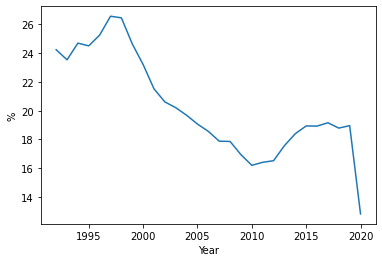

In [227]:
combined_sales["Men's Percentage (%)"].plot(ylabel="%")